In [2]:
import pandas as pd 
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("seaborn-colorblind")
import sys
from bs4 import BeautifulSoup as bs
import requests
from wordcloud import WordCloud


In [3]:
#IMPORTAMOS EL CSV CON TODOS LOS DATOS DE LAST.FM
df = pd.read_csv('data\lastfm.csv')
df.columns=['artista', 'album', 'cancion', 'fecha']  #Renombramos las columnas para saber el tipo de dato que tenemos
print(len(df))  #Vemos que tenemos 86699 escuchas para realizar nuestro EDA.



86699


count           86699
unique          17115
top       Permanating
freq              301
Name: cancion, dtype: object
La media de escuchas de cada canción es de: 5.065673385918784
La moda de escuchas de cada canción es de: 0    1
dtype: int64
La mediana de escuchas de cada canción es de: 2.0


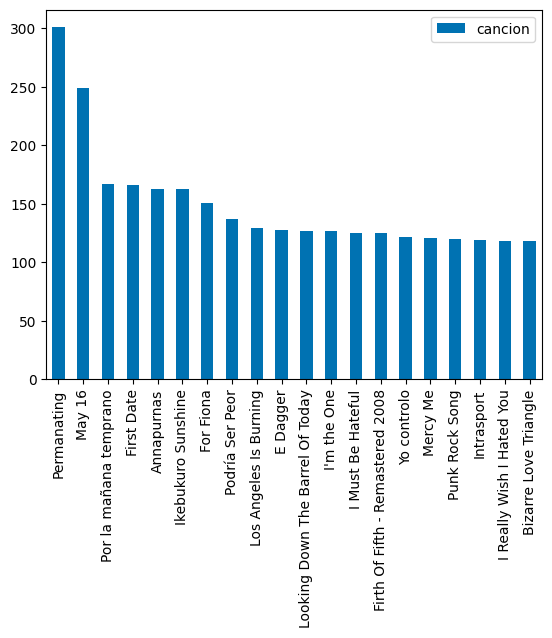

In [3]:
#MÉTRICAS CON CANCIONES
print(df['cancion'].describe()) #Con esto sacamos la descripción de la columa canciones

estadisticos_canciones = df['cancion'].value_counts(dropna=False)

#Sacamos la media de escuchas de cada canción
print("La media de escuchas de cada canción es de: " + str(estadisticos_canciones.mean()))

#Sacamos la moda de escuchas de cada canción 
print("La moda de escuchas de cada canción es de: " + str(estadisticos_canciones.mode()))

#Sacamos la mediana de escuchas de cada canción 
print("La mediana de escuchas de cada canción es de: " + str(estadisticos_canciones.median()))

#Sacamos un gráfico con las 20 canciones más escuchadas
las_20_canciones = round(df['cancion'].value_counts(normalize = False),3).head(20) #Redondeamos con dos decimales de precisión
las_20_canciones.plot(kind="bar", grid=False, legend=True); 
plt.savefig('outputs/cancion.png')

count          85655
unique          7447
top       Bellavista
freq             759
Name: album, dtype: object
La media de escuchas de cada album es de: 5.065673385918784
La moda de escuchas de cada album es de: 0    1
dtype: int64
La mediana de escuchas de cada album es de: 2.0


c:\Users\Andrés\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "grid" which is no longer supported as of 3.3 and will become an error in 3.6


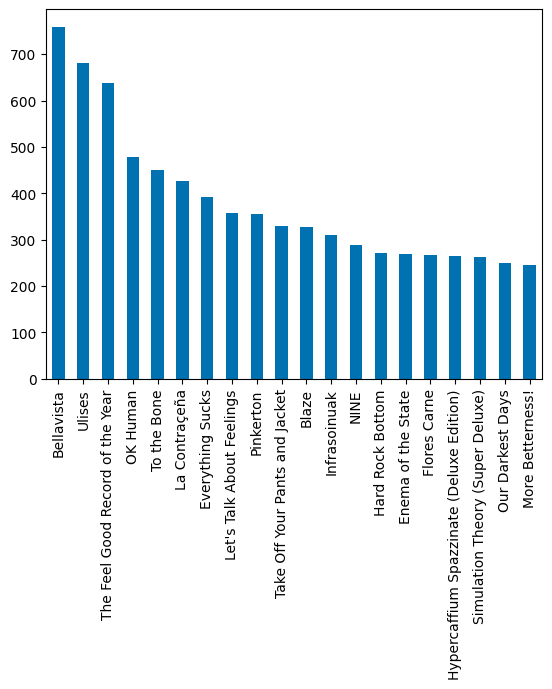

In [4]:
#MÉTRICAS CON ÁLBUMS
print(df['album'].describe()) #Con esto sacamos la descripción de la columa album

estadisticos_album = df['cancion'].value_counts(dropna=False)

#Sacamos la media de escuchas de cada album
print("La media de escuchas de cada album es de: " + str(estadisticos_album.mean()))

#Sacamos la moda de escuchas de cada album 
print("La moda de escuchas de cada album es de: " + str(estadisticos_album.mode()))

#Sacamos la mediana de escuchas de cada album 
print("La mediana de escuchas de cada album es de: " + str(estadisticos_album.median()))

#Sacamos un gráfico con los 20 albums más escuchados
los_20_albums = round(df['album'].value_counts(normalize = False),3).head(20)
los_20_albums.plot(kind="bar"); 
plt.savefig('outputs/albums.jpg', grid=False)

In [5]:
#MÉTRICAS CON ARTISTAS
print(df['artista'].describe()) #Con esto sacamos la descripción de la columa artista

estadisticos_artista = df['artista'].value_counts(dropna=False)

#Sacamos la media de escuchas de cada artista
print("La media de escuchas de cada artista es de: " + str(estadisticos_artista.mean()))

#Sacamos la moda de escuchas de cada artista 
print("La moda de escuchas de cada artista es de: " + str(estadisticos_artista.mode()))

#Sacamos la mediana de escuchas de cada artista 
print("La mediana de escuchas de cada artista es de: " + str(estadisticos_artista.median()))



count            86699
unique            2766
top       Bad Religion
freq              1915
Name: artista, dtype: object
La media de escuchas de cada artista es de: 31.344540853217644
La moda de escuchas de cada artista es de: 0    1
dtype: int64
La mediana de escuchas de cada artista es de: 2.0


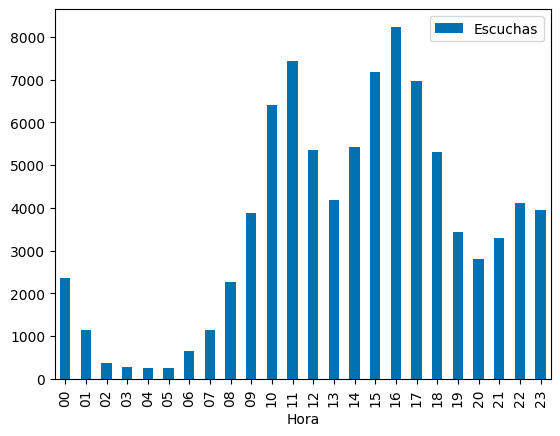

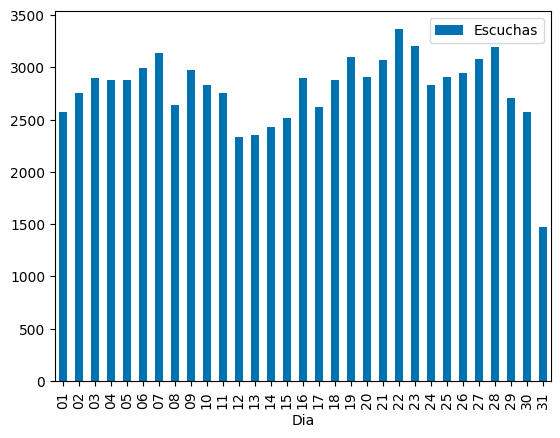

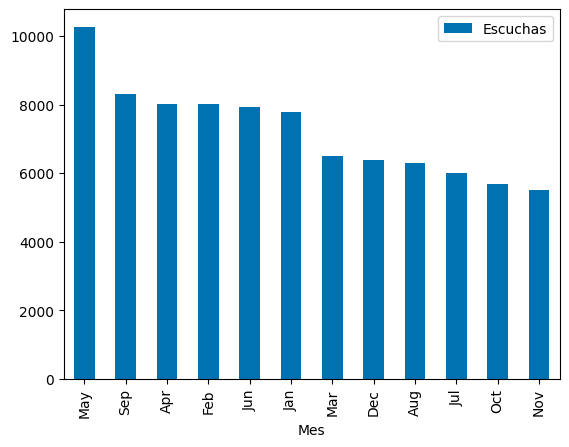

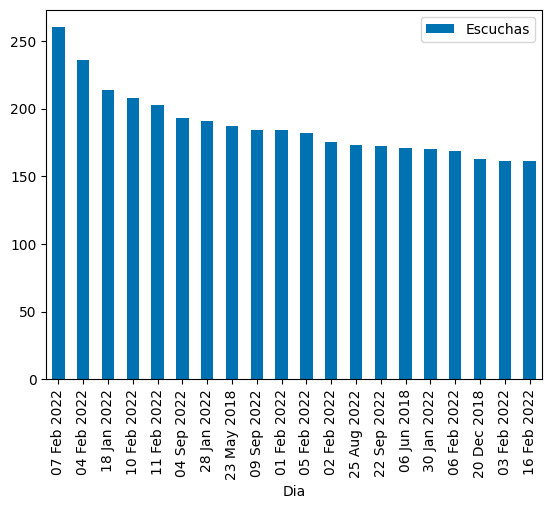

In [5]:
#Métricas con las fechas de las canciones

fecha = df.iloc[:,3]
Dia = df.iloc[:,3].str[0:2].value_counts()
Mes = df.iloc[:,3].str[3:6].value_counts()
anio = df.iloc[:,3].str[7:11].value_counts()
Hora = df.iloc[:,3].str[12:14].value_counts()
dias_mas_escuchados = df.iloc[:,3].str[0:11].value_counts().head(20)

#Imprimimos las horas donde más música escucho
x = pd.DataFrame({'Hora':Hora.index, 'Escuchas':Hora.values}).sort_values('Hora')
x.plot(kind='bar',x='Hora',y='Escuchas', grid=False)
plt.savefig('outputs/horas.jpg')

#Imprimimos la música que escucho en función del día de la semana
x = pd.DataFrame({'Dia':Dia.index, 'Escuchas':Dia.values}).sort_values('Dia')
x.plot(kind='bar',x='Dia',y='Escuchas', grid=False)
plt.savefig('outputs/dia_funcion.jpg')

#Imprimimos los meses donde más música escucho
x = pd.DataFrame({'Mes':Mes.index, 'Escuchas':Mes.values})
x.plot(kind='bar',x='Mes',y='Escuchas', grid=False)
plt.savefig('outputs/Mes.jpg')

#Imprimimos los días de la semana donde más música he escuchado
x = pd.DataFrame({'Dia':dias_mas_escuchados.index, 'Escuchas':dias_mas_escuchados.values})
x.plot(kind='bar',x='Dia',y='Escuchas', grid=False)
plt.savefig('outputs/Dia.jpg')
plt.savefig('outputs/Dia.png')

In [7]:
#Esta parte es el webscrap para sacar los géneros musicales de cada artista según la info proporcionada por Last.FM

#Generamos el dataframe con las primeras 200 bandas ordenadas en función del nº de escuchas
las_200_bandas = df.artista.value_counts(dropna=False).to_frame().head(200)

#CREAMOS UNA LISTA DONDE INDEXAMOS TODAS LAS BANDAS
bandas = list(las_200_bandas.index.values)
for banda in bandas:
       banda.replace(" ", "+")
       url = "https://www.last.fm/music/" + str(banda) #Nos permite iterar en funcion de la lista de bandas que hemos generado
       response = requests.get(url)
       html = response.content
       soup = bs(html, "lxml")
       print(soup.h1.get_text().lower(), end=",")  #Aqui sacamos el nombre de la banda (coincide con el h1 de la pag)
       all_a = soup.find_all(class_="tag")
       for tag in all_a:
              print(tag.get_text(), end=",")   #Aqui sacamos todos los tags asociados.
       print()

#Este primer bucle nos devuelve toda la información separada por comas. Para guardarlo como txt utilicé un script bash
#$ python ./scrap.py > 200.txt que me permitió guardar todo el output en un archvio TXT donde todo está separado por comas
#Para así poderlo leer posteriormente como CSV con Pandas


bad religion,punk rock,punk,american artist,political,rock,
viva belgrado,screamo,post-rock,spanish,real screamo,post-hardcore,
no use for a name,punk rock,punk,pop punk,rock,alternative,
weezer,alternative rock,rock,alternative,indie,indie rock,
lagwagon,punk rock,punk,pop punk,skate punk,hardcore,
steven wilson,progressive rock,experimental,singer-songwriter,progressive,steven wilson,
blink-182,punk rock,pop punk,punk,rock,alternative,
king gizzard & the lizard wizard,psychedelic rock,garage rock,psychedelic,australian,progressive rock,
descendents,punk,punk rock,hardcore punk,pop punk,hardcore,
muse,alternative rock,rock,alternative,progressive rock,british,
warcry,power metal,heavy metal,d-beat,spanish metal,metal,
millencolin,punk rock,skate punk,punk,swedish,rock,
porcupine tree,progressive rock,progressive metal,rock,psychedelic,psychedelic rock,
queens of the stone age,stoner rock,alternative rock,rock,hard rock,alternative,
h2o,hardcore,melodic hardcore,hardcore punk,punk,punk

KeyboardInterrupt: 

In [ ]:
df = pd.read_csv('data/lastfm.csv')
df.columns=['artista', 'album', 'cancion', 'fecha']
lista_bandas = []
#DATAFRAME CON TODAS LAS BANDAS
webs = df.artista.value_counts(dropna=False).to_frame().head(200)

#CREAMOS UNA LISTA DONDE INDEXAMOS TODAS LAS BANDAS
bandas = list(webs.index.values)
for banda in bandas:
       banda.replace(" ", "+").replace( ",", "")
       url = "https://www.last.fm/music/" + str(banda)
       response = requests.get(url)
       html = response.content
       soup = bs(html, "lxml")
       nombre_banda = soup.h1.get_text().lower() #Aqui sacamos el nombre de la banda
       all_a = soup.find_all(class_="tag")
       lista_tags=[]  #Generamos una lista vacía para insertar todos los tags.
       
       for tag in (all_a):
              l=tag.get_text()   #Aqui sacamos todos los tags asociados.
              lista_tags.append(l)
       
       data = {"banda": nombre_banda, "generos": lista_tags,}
       lista_bandas.append(data)
       
df=pd.DataFrame(lista_bandas)
df.to_json("data/200.json")

#Este script nos genera otro dataset con la misma información pero como archivo JSON.
#Aunque ahora no nos sea de utilidad puede que para la parte de Machine Learning o Deep Learning sea más útil.


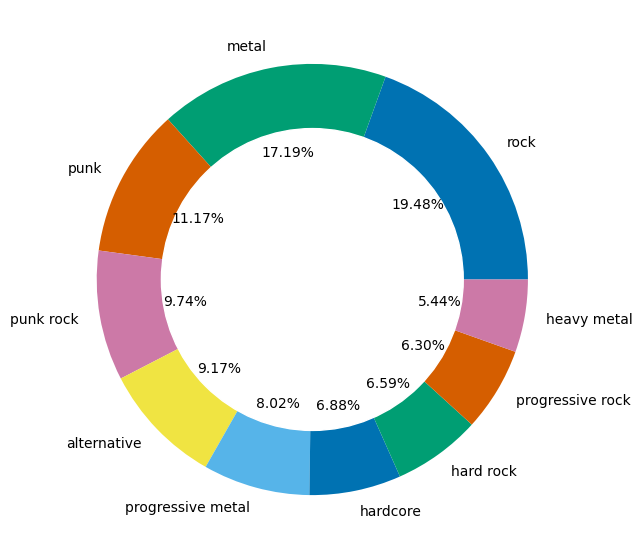

In [11]:
#Análisis 200 bandas. Primero creamos el dataframe 
df = pd.read_csv("data/200.txt")
df.columns=['banda', 'genero1', 'genero2', 'genero3', 'genero4', 'genero5', 'genero6']
a = df['genero1'].append(df['genero2']).reset_index(drop=True).append(df['genero3']).reset_index(drop=True).append(df['genero4']).reset_index(drop=True).append(df['genero5']).reset_index(drop=True).append(df['genero6']).reset_index(drop=True)
data = a.dropna().value_counts().head(10)

my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.figure(figsize=(7,7))
plt.pie(data.values,
        labels=data.index,
        autopct='%1.2f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
p.savefig('outputs/corona200.png')


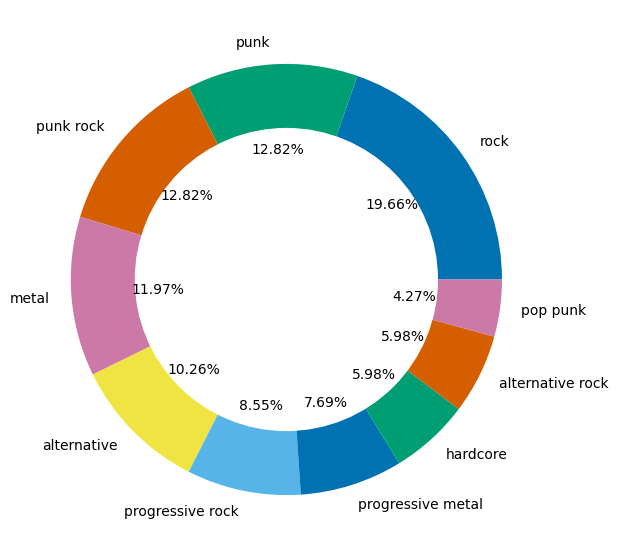

In [9]:
#Análisis 200 bandas. Primero creamos el dataframe contando solo las primeras 50 columnas
df = pd.read_csv("data/200.txt")
df = df.head(50)
df.columns=['banda', 'genero1', 'genero2', 'genero3', 'genero4', 'genero5', 'genero6']
a = df['genero1'].append(df['genero2']).reset_index(drop=True).append(df['genero3']).reset_index(drop=True).append(df['genero4']).reset_index(drop=True).append(df['genero5']).reset_index(drop=True).append(df['genero6']).reset_index(drop=True)
data = a.dropna().value_counts().head(10)
pd.DataFrame(data)

my_circle=plt.Circle( (0,0), 0.7, color='white')

plt.figure(figsize=(7,7))
plt.pie(data.values,
        labels=data.index,
        autopct='%1.2f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()
p.savefig('outputs/corona50.png')

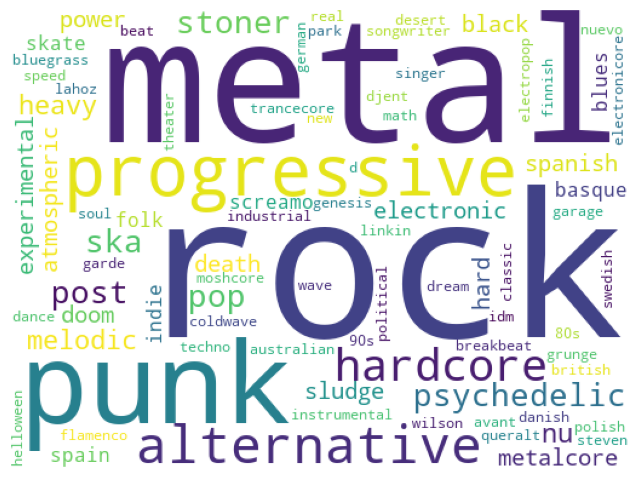

In [11]:
raw = df['genero1'].append(df['genero2']).reset_index(drop=True).append(df['genero3']).reset_index(drop=True).append(df['genero4']).reset_index(drop=True).append(df['genero5']).reset_index(drop=True).append(df['genero6']).reset_index(drop=True)
bands = raw.dropna()
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(
                          background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(bands))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('outputs/wordcloud200.jpg')